In [ ]:
import numpy
import glob
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

def calculate_metrics(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn)  
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_true, y_prob)
    return accuracy, sensitivity, specificity, roc_auc

def classification_lr(folders_mean_train, folders_mean_test, folders_pca_train, folders_pca_test):
    for representation in [(folders_mean_train, folders_mean_test), (folders_pca_train, folders_pca_test)]:
        metrics = {'accuracy': [], 'sensitivity': [], 'specificity': [], 'roc_auc': []}
        all_y_true = []
        all_y_scores = []
        
        for fold, (folder_train, folder_test) in enumerate(zip(representation[0], representation[1])):
            # training
            files_train = sorted(glob.glob(f'{folder_train[0]}/*') + glob.glob(f'{folder_train[1]}/*') + glob.glob(f'{folder_train[2]}/*'))
            if any(sub in files_train[0] for sub in ['0bk', 'win', 'l', 'story', 'rmd', 'relation', 'neut']):
                files_train_0 = files_train[::2]
                files_train_1 = files_train[1::2]
            elif any(sub in files_train[1] for sub in ['0bk', 'win', 'l', 'story', 'rmd', 'relation', 'neut']):
                files_train_0 = files_train[1::2]
                files_train_1 = files_train[::2]
            else:
                return "problem"

            A_mean_0 = numpy.mean([numpy.load(file) for file in files_train_0], axis=2)
            A_mean_1 = numpy.mean([numpy.load(file) for file in files_train_1], axis=2)

            X_train = numpy.vstack((A_mean_0, A_mean_1))
            y_train = numpy.hstack((numpy.zeros(A_mean_0.shape[0]), numpy.ones(A_mean_1.shape[0])))

            model = LogisticRegression(random_state=0)
            model.fit(X_train, y_train)

            # testing
            files_test = sorted(glob.glob(f'{folder_test}/*'))
            if any(sub in files_test[0] for sub in ['0bk', 'win', 'l', 'story', 'rmd', 'relation', 'neut']):
                files_test_0 = files_test[::2]
                files_test_1 = files_test[1::2]
            elif any(sub in files_test[1] for sub in ['0bk', 'win', 'l', 'story', 'rmd', 'relation', 'neut']):
                files_test_0 = files_test[1::2]
                files_test_1 = files_test[::2]
            else:
                return "problem"

            A_mean_0 = numpy.mean([numpy.load(file) for file in files_test_0], axis=2)
            A_mean_1 = numpy.mean([numpy.load(file) for file in files_test_1], axis=2)

            X_test = numpy.vstack((A_mean_0, A_mean_1))
            y_true = numpy.hstack((numpy.zeros(A_mean_0.shape[0]), numpy.ones(A_mean_1.shape[0])))

            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]

            all_y_true.extend(y_true)
            all_y_scores.extend(y_prob)

            acc, sens, spec, roc_auc = calculate_metrics(y_true, y_pred, y_prob)
            metrics['accuracy'].append(acc)
            metrics['sensitivity'].append(sens)
            metrics['specificity'].append(spec)
            metrics['roc_auc'].append(roc_auc)

        print(f'{representation[1][0].split("/")[-1]} {representation[1][0].split("/")[3]}:')
        for metric_name, values in metrics.items():
            print(f'Mean {metric_name}: {numpy.mean(values) * 100:.2f}%, Std: {numpy.std(values) * 100:.2f}%')

        fpr, tpr, _ = roc_curve(all_y_true, all_y_scores)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

WM mean:
Mean accuracy: 98.19%, Std: 0.86%
Mean sensitivity: 98.10%, Std: 1.78%
Mean specificity: 98.28%, Std: 0.35%
Mean roc_auc: 99.88%, Std: 0.03%


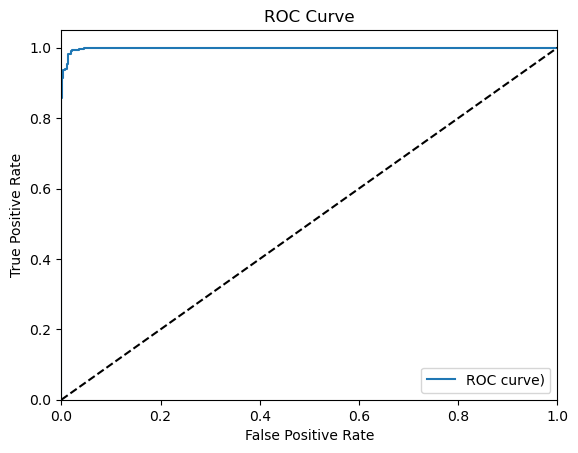

WM pca:
Mean accuracy: 97.42%, Std: 0.58%
Mean sensitivity: 97.42%, Std: 1.33%
Mean specificity: 97.42%, Std: 0.58%
Mean roc_auc: 99.78%, Std: 0.04%


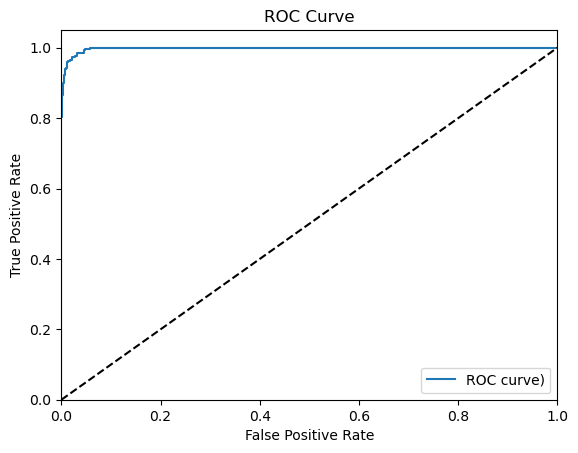

GAMBLING mean:
Mean accuracy: 97.07%, Std: 0.39%
Mean sensitivity: 97.24%, Std: 0.85%
Mean specificity: 96.90%, Std: 0.34%
Mean roc_auc: 99.20%, Std: 0.32%


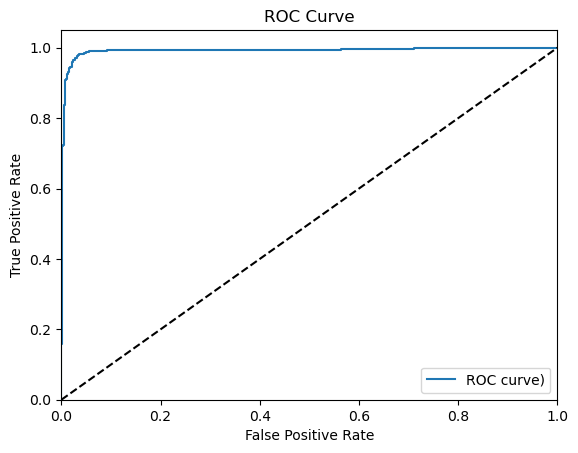

GAMBLING pca:
Mean accuracy: 96.73%, Std: 0.72%
Mean sensitivity: 96.90%, Std: 0.78%
Mean specificity: 96.56%, Std: 0.85%
Mean roc_auc: 99.19%, Std: 0.46%


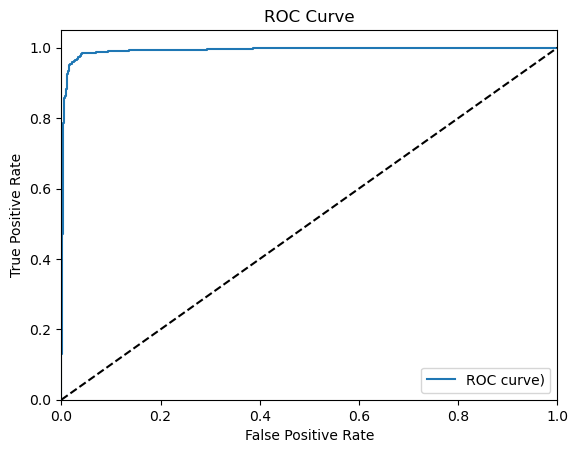

MOTOR mean:
Mean accuracy: 99.57%, Std: 0.28%
Mean sensitivity: 99.66%, Std: 0.34%
Mean specificity: 99.49%, Std: 0.57%
Mean roc_auc: 99.99%, Std: 0.01%


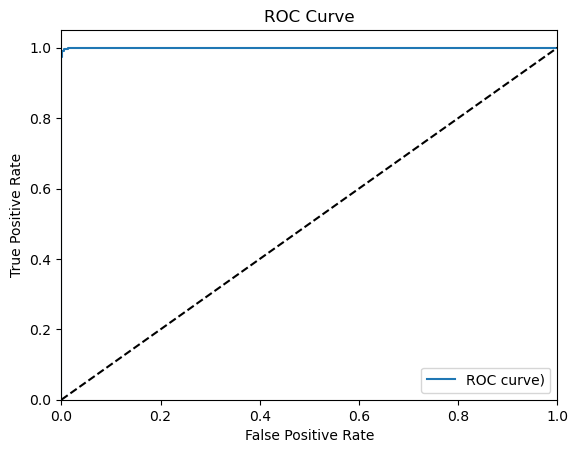

MOTOR pca:
Mean accuracy: 98.54%, Std: 0.95%
Mean sensitivity: 98.28%, Std: 1.04%
Mean specificity: 98.80%, Std: 1.40%
Mean roc_auc: 99.96%, Std: 0.04%


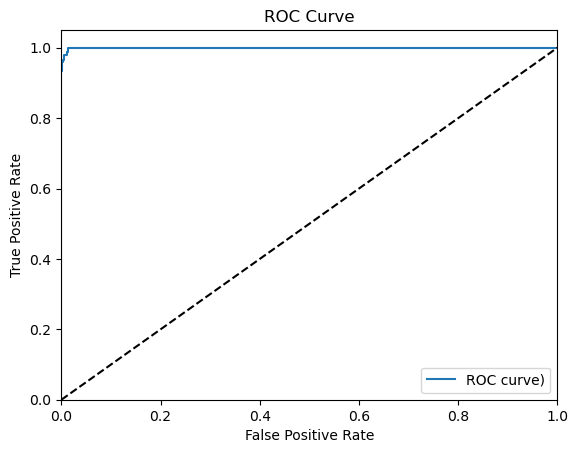

LANGUAGE mean:
Mean accuracy: 99.74%, Std: 0.29%
Mean sensitivity: 99.66%, Std: 0.34%
Mean specificity: 99.83%, Std: 0.30%
Mean roc_auc: 100.00%, Std: 0.01%


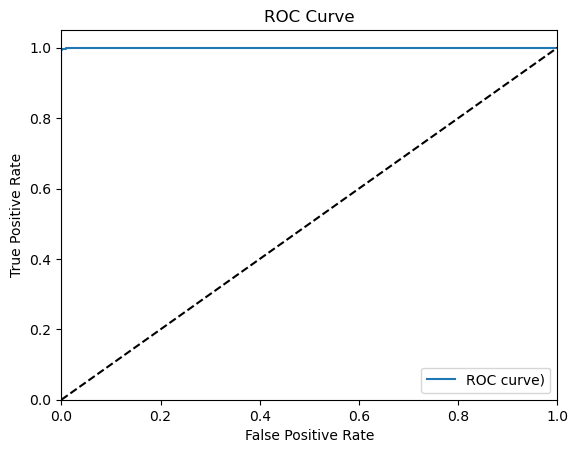

LANGUAGE pca:
Mean accuracy: 99.31%, Std: 0.42%
Mean sensitivity: 99.31%, Std: 0.49%
Mean specificity: 99.31%, Std: 0.48%
Mean roc_auc: 99.99%, Std: 0.01%


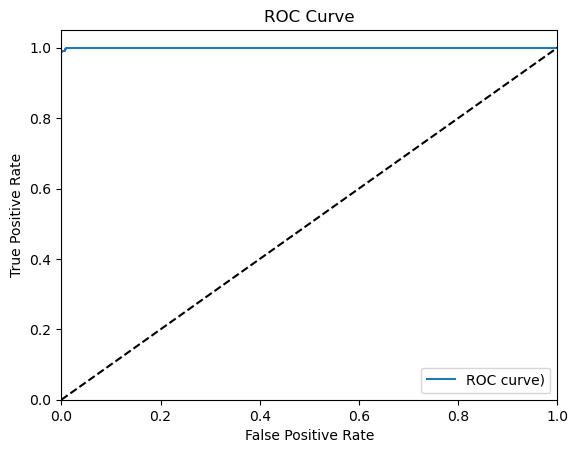

SOCIAL mean:
Mean accuracy: 99.48%, Std: 0.17%
Mean sensitivity: 99.48%, Std: 0.57%
Mean specificity: 99.48%, Std: 0.30%
Mean roc_auc: 100.00%, Std: 0.00%


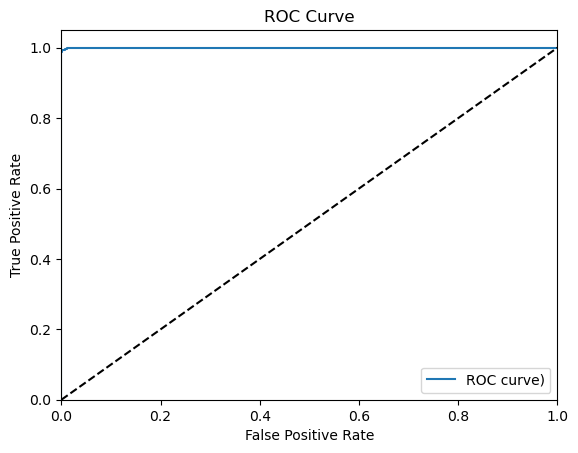

SOCIAL pca:
Mean accuracy: 99.40%, Std: 0.29%
Mean sensitivity: 99.48%, Std: 0.57%
Mean specificity: 99.31%, Std: 0.00%
Mean roc_auc: 99.99%, Std: 0.01%


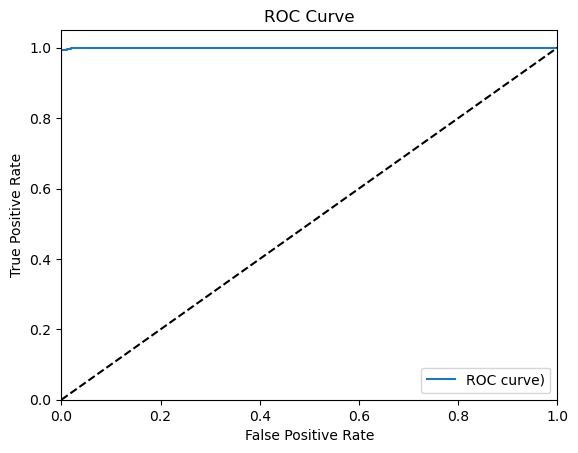

RELATIONAL mean:
Mean accuracy: 98.11%, Std: 0.52%
Mean sensitivity: 98.28%, Std: 1.04%
Mean specificity: 97.94%, Std: 1.09%
Mean roc_auc: 99.86%, Std: 0.08%


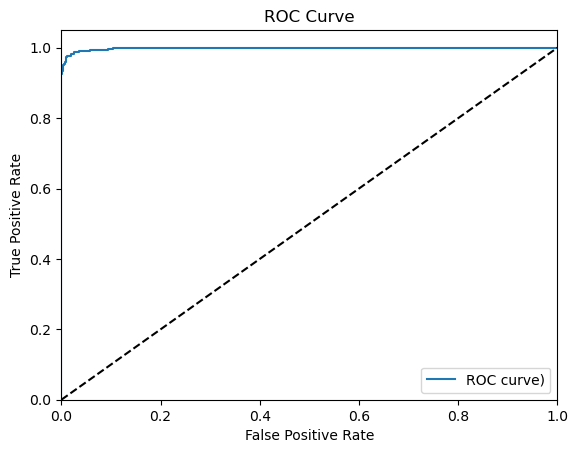

RELATIONAL pca:
Mean accuracy: 97.68%, Std: 1.20%
Mean sensitivity: 97.94%, Std: 0.97%
Mean specificity: 97.42%, Std: 1.85%
Mean roc_auc: 99.81%, Std: 0.12%


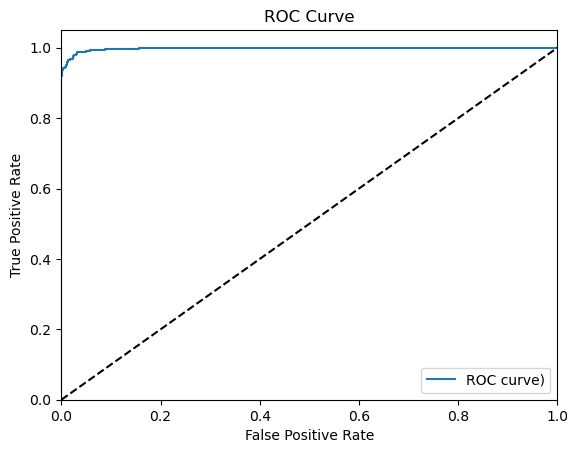

EMOTION mean:
Mean accuracy: 98.45%, Std: 1.04%
Mean sensitivity: 97.94%, Std: 1.75%
Mean specificity: 98.97%, Std: 0.34%
Mean roc_auc: 99.76%, Std: 0.23%


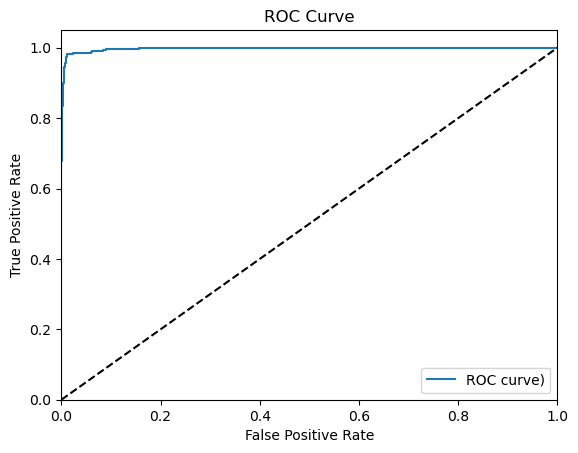

EMOTION pca:
Mean accuracy: 97.42%, Std: 0.99%
Mean sensitivity: 97.07%, Std: 2.15%
Mean specificity: 97.76%, Std: 0.75%
Mean roc_auc: 99.65%, Std: 0.25%


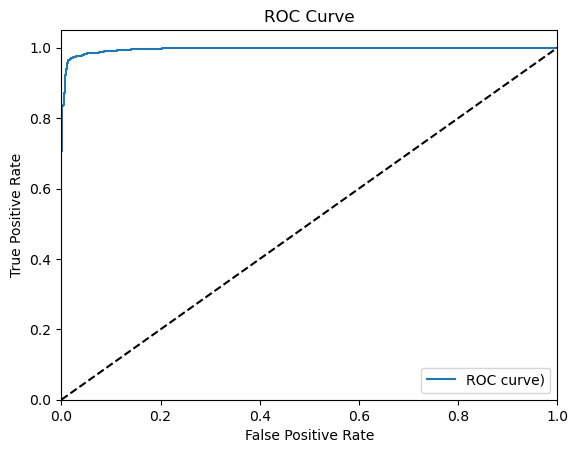

In [ ]:
import paths    # local file containing data paths


list_folders_mean_train = [paths.folders_mean_ensemble_edges_train_wm, paths.folders_mean_ensemble_edges_train_gambling,
                    paths.folders_mean_ensemble_edges_train_motor, paths.folders_mean_ensemble_edges_train_language,
                    paths.folders_mean_ensemble_edges_train_social, paths.folders_mean_ensemble_edges_train_relational,
                    paths.folders_mean_ensemble_edges_train_emotion]
list_folders_pca_train = [paths.folders_pca_ensemble_edges_train_wm, paths.folders_pca_ensemble_edges_train_gambling,
                    paths.folders_pca_ensemble_edges_train_motor, paths.folders_pca_ensemble_edges_train_language,
                    paths.folders_pca_ensemble_edges_train_social, paths.folders_pca_ensemble_edges_train_relational,
                    paths.folders_pca_ensemble_edges_train_emotion]

list_folders_mean_test = [paths.folders_mean_ensemble_edges_test_wm, paths.folders_mean_ensemble_edges_test_gambling,
                    paths.folders_mean_ensemble_edges_test_motor, paths.folders_mean_ensemble_edges_test_language,
                    paths.folders_mean_ensemble_edges_test_social, paths.folders_mean_ensemble_edges_test_relational,
                    paths.folders_mean_ensemble_edges_test_emotion]
list_folders_pca_test = [paths.folders_pca_ensemble_edges_test_wm, paths.folders_pca_ensemble_edges_test_gambling,
                    paths.folders_pca_ensemble_edges_test_motor, paths.folders_pca_ensemble_edges_test_language,
                    paths.folders_pca_ensemble_edges_test_social, paths.folders_pca_ensemble_edges_test_relational,
                    paths.folders_pca_ensemble_edges_test_emotion]

for folders_mean_train, folders_mean_test, folders_pca_train, folders_pca_test in zip(list_folders_mean_train, list_folders_mean_test, list_folders_pca_train, list_folders_pca_test):
    classification_lr(folders_mean_train, folders_mean_test, folders_pca_train, folders_pca_test)